## Check simulations of BDs

In [1]:
import sys
#sys.path.append("../python/")
sys.path.append("../python/cluster")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes
import imp
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population, spatial_sampling, rho, IMF_sampling
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM

from matplotlib import rc
rc('font', family='times new roman', size=22.)

ModuleNotFoundError: No module named 'mock_generation'

### Empirical space densities at the Solar neighbourhood

Data below is taken from Table 15 of [Kirkpatrick + '20](https://arxiv.org/abs/2011.11616)

In [3]:
# temperature [K]
bin_edges = [300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250] 
# space density [x 1e-3 pc-3]
rho       = [2.84, 4.24, 2.80, 1.99, 1.72, 1.11, 1.95, 0.94, 0.81, 0.78, 0.50, 0.72, 0.31] 
error_rho = [np.nan, 0.70, 0.37, 0.32, 0.30, 0.25, 0.30, 0.22, 0.20, 0.20, 0.17, 0.18, np.nan]

bins = np.zeros(len(rho))

for i in range(len(rho)):
    bins[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

#TODO - need to plot arrows for lower limits

Text(0.5, 0, '$T_{\\rm eff}$ [K]')

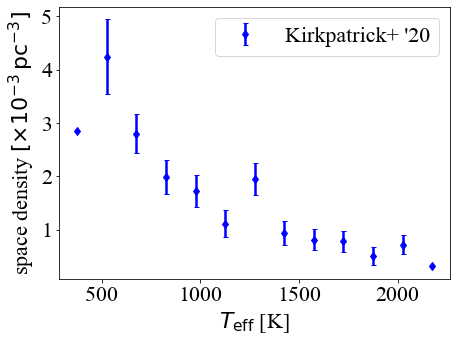

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(bins, rho, error_rho, fmt="d", elinewidth=2.5, capsize=2.5, label="Kirkpatrick+ '20", color="blue")

ax.legend()
ax.set_ylabel(r"space density $\rm [\times 10^{-3}\,pc^{-3}]$")
ax.set_xlabel(r"$T_{\rm eff}$ [K]")

### Spatial distribution

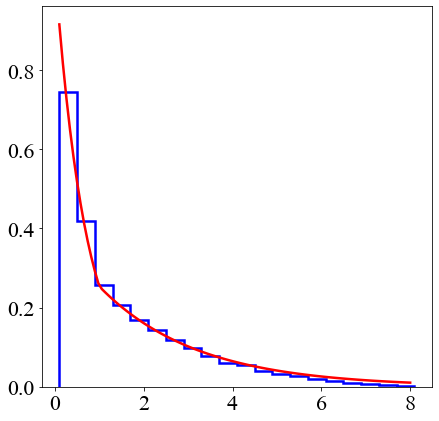

In [31]:
# Checking sampling results

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)


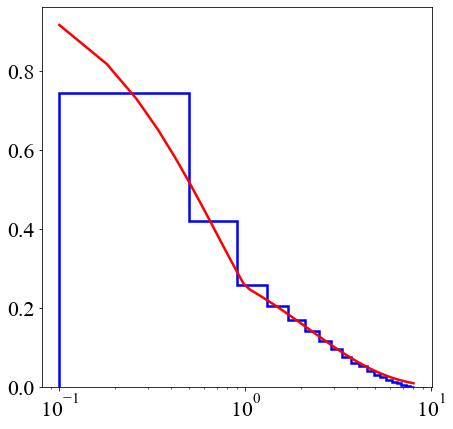

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)

ax.set_xscale("log")

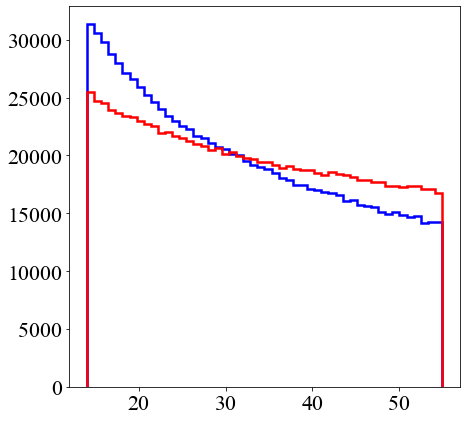

In [14]:
from utils import random_powerlaw

N = 1000000
mass1 = random_powerlaw(-0.6, N, Mmin=14, Mmax=55)
mass2 = random_powerlaw(-0.3, N, Mmin=14, Mmax=55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
_, _, _ = ax.hist(mass1, color="blue", histtype="step", bins=50, linewidth=2.5)
_, _, _ = ax.hist(mass2, histtype="step", color="red", bins=50, linewidth=2.5)

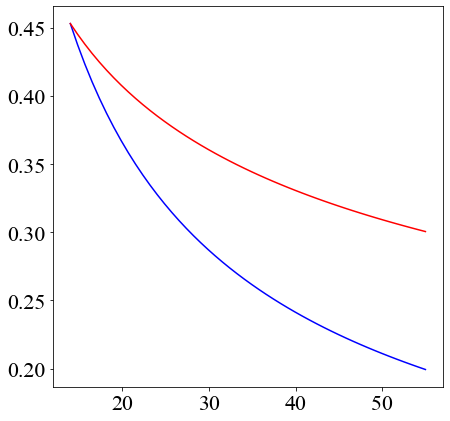

In [11]:
def IMF(M, alpha):
    return np.power(M, -alpha)

M = np.linspace(14, 55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

## Noise in mass estimate

In [15]:
import sys
sys.path.append("../python/")
import imp

import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mock_population?

In [11]:
_, _, mass1, mass_wn1, _ = mock_population(1000, 0.1, 0.1, 1., 1., 5.)
_, _, mass2, mass_wn2, _ = mock_population(1000, 0.1, 0.2, 1., 1., 5.)

In [14]:
print(np.sum(np.abs(mass_wn1 - mass1)/mass1)/1000*100)
print(np.sum(np.abs(mass_wn2 - mass2)/mass2)/1000*100)

7.872992834442383
15.97226555827462


Text(0.5, 0, '$\\sigma_M$')

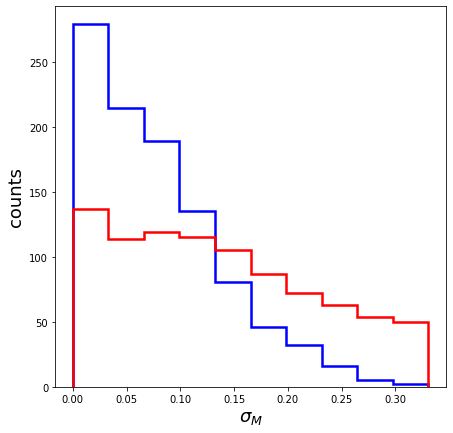

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist(np.abs(mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist(np.abs(mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

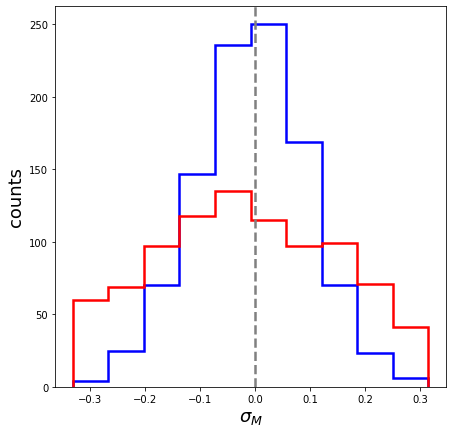

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist((mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist((mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0., ls="--", color="grey", lw=2.5)
ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

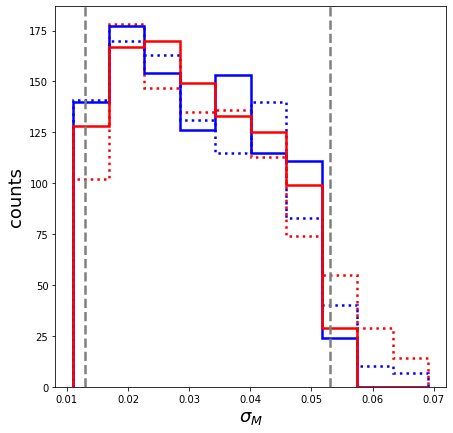

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

_, bins, _ = ax.hist(mass1, histtype="step", color="b", ls=":", lw=2.5)
_, _, _    = ax.hist(mass2, histtype="step", color="r", ls=":", lw=2.5, bins=bins)
counts1, _, _ = ax.hist(mass_wn1, histtype="step", color="b", lw=2.5, bins=bins)
counts2, _, _    = ax.hist(mass_wn2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0.013, ls="--", color="grey", lw=2.5)
ax.axvline(0.053, ls="--", color="grey", lw=2.5)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

## DM velocity dispersion

In [5]:
from scipy.special import hyp2f1
from scipy.interpolate import interp1d

def vgNFW(Rsun, R, parameters):
    """
    Rotation velocity for gNFW dark matter density profile
    """
    # gNFW parameters
    gamma = parameters[0]
    Rs    = parameters[1]
    rho0  = parameters[2]
    v     = [];
    for Rint in R:
        hyp=np.float(hyp2f1(3-gamma,3-gamma,4-gamma,-Rint/Rs))
        Integral=(-2**(2+3*gamma)*np.pi*Rint**(3-gamma)*(1+
                  Rsun*(1./Rs))**(3-gamma)*rho0*hyp)/(-3+gamma)
        v.append(np.sqrt(1.18997*10.**(-31.)*Integral/Rint)*3.08567758*10.**(16.))
    v = np.array(v,dtype=np.float64)
    # Return
    return v

def vc(Rsun, Rint, parameters, filepath):
    data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
    r = data[0]
    vB = data[1]
    data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
    vD = data[1]
    vDM = vgNFW(Rsun, r, parameters)
    vtot = np.sqrt(np.power(vB, 2) + np.power(vD, 2)+ np.power(vDM, 2))
    vtot_intp = interp1d(r, vtot)
    return vtot_intp(Rint)

In [12]:
R0 = 8.178
r  = np.linspace(0.1, R0, 500)
parameters = [1., 20., 0.42]
filepath = "/home/mariacst/cluster/data/"

rc = vc(R0, r, parameters, filepath)

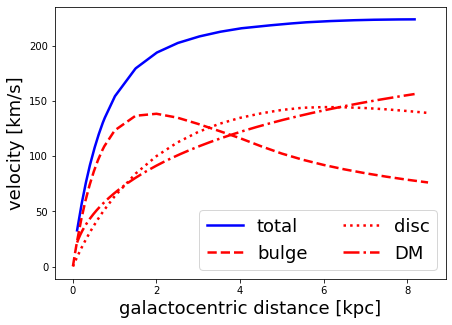

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(r, rc, ls="-", lw=2.5, color="blue", label="total")

data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
ax.plot(data[0], data[1], ls="--", color="red", label="bulge", lw=2.5)
data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
ax.plot(data[0], data[1], ls=":", color="red", label="disc", lw=2.5)
ax.plot(r, vgNFW(R0, r, parameters), ls="-.", color="red", label="DM", lw=2.5)

ax.legend(loc=4, ncol=2, fontsize=18)
ax.set_ylabel("velocity [km/s]", fontsize=18)
ax.set_xlabel("galactocentric distance [kpc]", fontsize=18)
fig.savefig("../../Figs/rc.pdf", bbox_inches="tight")